In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/notebooks_python/tfm/yolov5_algorithm/
%ls -al ../

/content/drive/MyDrive/notebooks_python/tfm/yolov5_algorithm
total 16
drwx------ 2 root root 4096 Nov  6 17:36 datos/
-rw------- 1 root root  276 Nov 15 19:27 kitti_dataset_no_distances.yaml
-rw------- 1 root root  657 Nov 14 15:45 kitti_dataset.yaml
-rw------- 1 root root 1662 Nov 14 17:52 kitti_hyps.yaml
drwx------ 2 root root 4096 Nov  7 15:33 yolov4_algorithm/
drwx------ 2 root root 4096 Nov 18 14:56 yolov5_algorithm/


In [ ]:
%cd /content/
%rm -r yolov5
%ls -al ./
!git clone https://github.com/ultralytics/yolov5  # clone

%cd yolov5
%pip install -qr requirements.txt  # install

from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.0-166-g968e300 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/78.2 GB disk)


detect: weights=['yolov5s.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-159-gdb6ec66 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

100% 14.0M/14.0M [00:00<00:00, 28.6MB/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.032s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.029s)
Speed: 0.5ms pre-process, 30.1ms inference, 25.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


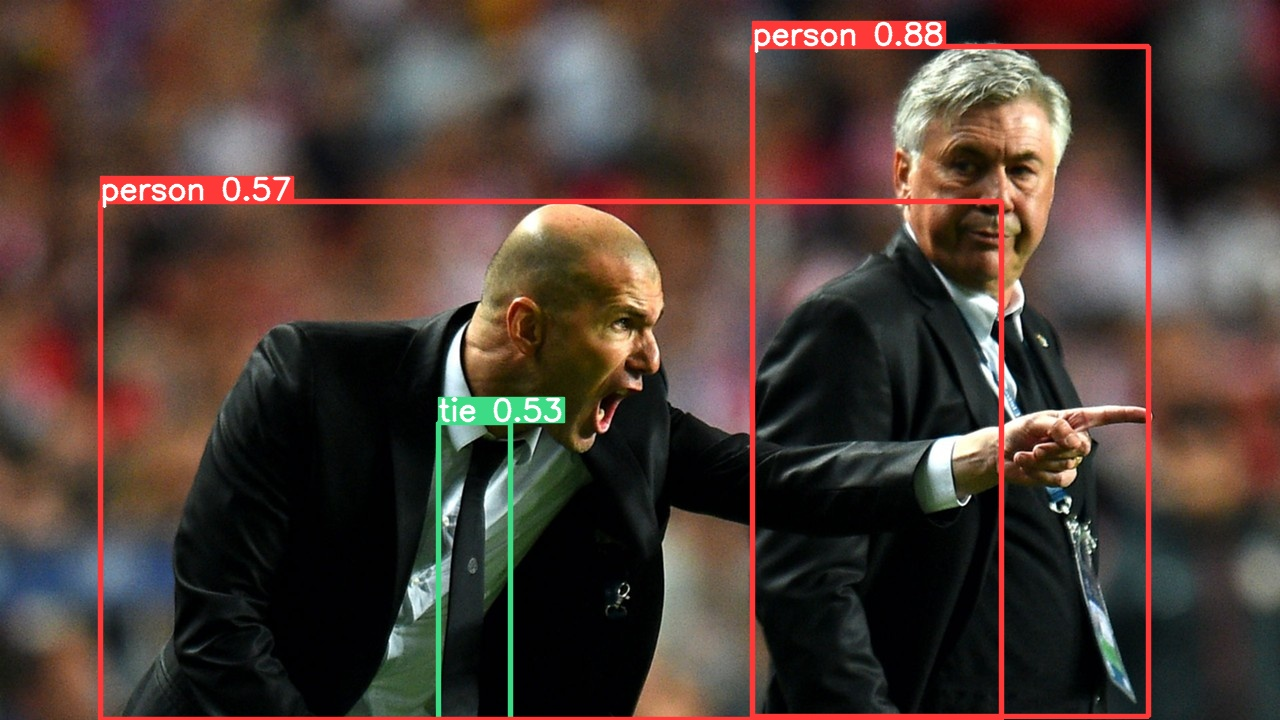

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

In [ ]:
import torch

In [ ]:
# import os
# import glob
# from sklearn.model_selection import train_test_split

# import numpy as np

# np.random.seed(3)

# ROOT_PATH = (
#     "/content/drive/MyDrive/notebooks_python/tfm/datos/"
# )
# IMG_PATH = os.path.join(ROOT_PATH, "data_object_image_2/training/images")
# LABEL_PATH = os.path.join(ROOT_PATH, "data_object_image_2/training/labels")

# images = glob.glob(os.path.join(IMG_PATH, "*.png"))

# not_used, X_train = train_test_split(images, train_size=0.8)
# X_train, x_val_test = train_test_split(X_train, train_size=0.7)
# x_val, x_test = train_test_split(x_val_test, test_size=.5)
# print(f"train: {len(X_train)}, validation: {len(x_val)}, test: {len(x_test)}")

# def get_path(fname):
#     return f"{ROOT_PATH}/{fname}" 

# with open(get_path("yolo_v5_no_distances_train.txt"), "w") as f:
#     for r in X_train:
#         f.write(r + "\n")

# with open(get_path("yolo_v5_no_distances_valid.txt"), "w") as f:
#     for r in x_val:
#         f.write(r + "\n")

# with open(get_path("yolo_v5_no_distances_test.txt"), "w") as f:
#     for r in x_test:
#         f.write(r + "\n")

# with open(get_path("yolo_v5_no_distances_not_used.txt"), "w") as f:
#     for r in not_used:
#         f.write(r + "\n")

# # %cp /content/drive/MyDrive/notebooks_python/tfm/datos/data_object_label_2/yolo_label/training/label_2/* /content/drive/MyDrive/notebooks_python/tfm/datos/data_object_image_2/training/image_2/

In [ ]:
import json
with open(
    "/content/drive/MyDrive/notebooks_python/tfm/datos/label_mapping_4_groups.json",
    "r"
) as f:
    label_mapping = json.load(f)

from pprint import pprint
pprint(label_mapping)

sorted(label_mapping, key=label_mapping.get)

{'Big Vehicle': 5,
 'Car': 0,
 'Others': 4,
 'Person': 2,
 'high': 6,
 'low': 3,
 'medium': 1}


['Car', 'medium', 'Person', 'low', 'Others', 'Big Vehicle', 'high']

In [ ]:
import yaml

with open(
    "/content/drive/MyDrive/notebooks_python/tfm/kitti_dataset_no_distances.yaml",
    "r"
) as f:
    yaml_file = yaml.safe_load(f)

yaml_file["names"] = sorted(label_mapping, key=label_mapping.get)
yaml_file["nc"] = len(sorted(label_mapping, key=label_mapping.get))

yaml_file

with open(
    "./data/kitti_dataset_multilabel.yaml",
    "w"
) as f:
    yaml.safe_dump(yaml_file, f)

%cat ./data/kitti_dataset_multilabel.yaml

names:
- Car
- medium
- Person
- low
- Others
- Big Vehicle
- high
nc: 7
path: /content/drive/MyDrive/notebooks_python/tfm/datos
test: yolo_v5_no_distances_test.txt
train: yolo_v5_no_distances_train.txt
val: yolo_v5_no_distances_valid.txt


In [ ]:
!head data/hyps/hyp.scratch.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# Hyperparameters for COCO training from scratch
# python train.py --batch 40 --cfg yolov5m.yaml --weights '' --data coco.yaml --img 640 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials

lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)


In [ ]:
%cp /content/drive/MyDrive/notebooks_python/tfm/kitti_hyps.yaml ./data/hyps/
%cat ./data/hyps/kitti_hyps.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# Hyperparameters for COCO training from scratch
# python train.py --batch 40 --cfg yolov5m.yaml --weights '' --data coco.yaml --img 640 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials

lr0: 0.001  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (effi

Configuramos un learning rate más alto para la capa convolucional. Usaremos 0.01 ya que que es el recomendado para el optimizador SGD utilizado por defecto por la red YOLOv5.

In [ ]:
!head ./data/hyps/kitti_hyps.yaml

!sed -i 's/lr0: 0.001  # initial learning rate (SGD=1E-2, Adam=1E-3)/lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)/' ./data/hyps/kitti_hyps.yaml

!head ./data/hyps/kitti_hyps.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# Hyperparameters for COCO training from scratch
# python train.py --batch 40 --cfg yolov5m.yaml --weights '' --data coco.yaml --img 640 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials

lr0: 0.001  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# Hyperparameters for COCO training from scratch
# python train.py --batch 40 --cfg yolov5m.yaml --weights '' --data coco.yaml --img 640 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials

lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay

Entrenamos solo la capa convolucional utilizando un modelo que tiene los pesos para imágenes con más píxeles (1280), ver enlace https://github.com/ultralytics/yolov5/releases


In [ ]:
%cp /content/drive/MyDrive/notebooks_python/tfm/yolov5_algorithm/20211226_yolo_v5_training_conv_6m.zip ./
!unzip ./20211226_yolo_v5_training_conv_6m.zip

Archive:  ./20211226_yolo_v5_training_conv_6m.zip
   creating: runs/train/exp2/
  inflating: runs/train/exp2/events.out.tfevents.1640596278.45a278c91323.13130.0  
  inflating: runs/train/exp2/train_batch1.jpg  
  inflating: runs/train/exp2/labels_correlogram.jpg  
  inflating: runs/train/exp2/train_batch2.jpg  
  inflating: runs/train/exp2/labels.jpg  
  inflating: runs/train/exp2/results.csv  
  inflating: runs/train/exp2/hyp.yaml  
   creating: runs/train/exp2/weights/
  inflating: runs/train/exp2/weights/best.pt  
  inflating: runs/train/exp2/weights/last.pt  
  inflating: runs/train/exp2/weights/epoch20.pt  
  inflating: runs/train/exp2/weights/epoch10.pt  
  inflating: runs/train/exp2/train_batch0.jpg  
  inflating: runs/train/exp2/events.out.tfevents.1640558712.8f49554d8aa9.11281.0  
  inflating: runs/train/exp2/events.out.tfevents.1640591500.45a278c91323.364.0  
  inflating: runs/train/exp2/events.out.tfevents.1640554878.8f49554d8aa9.410.0  
  inflating: runs/train/exp2/events.o

In [ ]:
 # segunda prueba, utilizamos un algoritmo entrenado con más píxeles
 # !python train.py --freeze 24 --batch 16 --epochs 50 --weights yolov5m6.pt --img 1280  --cache --data kitti_dataset_multilabel.yaml --patience 5 --save-period 10 --image-weights --hyp kitti_hyps.yaml
 !python train.py --freeze 24 --batch 16 --epochs 50 --resume runs/train/exp2/weights/last.pt --img 1280  --cache --data kitti_dataset_multilabel.yaml --patience 5 --save-period 10 --image-weights --hyp kitti_hyps.yaml

train: weights=yolov5s.pt, cfg=, data=kitti_dataset_multilabel.yaml, hyp=kitti_hyps.yaml, epochs=50, batch_size=16, imgsz=1280, rect=False, resume=runs/train/exp2/weights/last.pt, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=True, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=5, freeze=[24], save_period=10, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Resuming training from runs/train/exp2/weights/last.pt
YOLOv5 🚀 v6.0-159-gdb6ec66 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

In [ ]:
%ls runs/train/exp2/weights/

best.pt  epoch10.pt  epoch20.pt  epoch30.pt  last.pt


In [ ]:
# se guarda un backup (para evitar que se pare google collab)

%ls runs/train/exp2/weights/

!zip  -r 20211226_yolo_v5_training_conv_6m.zip runs/train/exp2
%ls -al | grep zip
%mv ./20211226_yolo_v5_training_conv_6m.zip /content/drive/MyDrive/notebooks_python/tfm/yolov5_algorithm/


best.pt  epoch10.pt  epoch20.pt  epoch30.pt  epoch40.pt  last.pt
  adding: runs/train/exp2/ (stored 0%)
  adding: runs/train/exp2/events.out.tfevents.1640596278.45a278c91323.13130.0 (deflated 55%)
  adding: runs/train/exp2/val_batch2_labels.jpg (deflated 8%)
  adding: runs/train/exp2/train_batch1.jpg (deflated 19%)
  adding: runs/train/exp2/labels_correlogram.jpg (deflated 20%)
  adding: runs/train/exp2/train_batch2.jpg (deflated 17%)
  adding: runs/train/exp2/events.out.tfevents.1640692414.e50a1fb94ebd.14295.0 (deflated 7%)
  adding: runs/train/exp2/labels.jpg (deflated 21%)
  adding: runs/train/exp2/events.out.tfevents.1640684082.e50a1fb94ebd.371.0 (deflated 65%)
  adding: runs/train/exp2/results.csv (deflated 82%)
  adding: runs/train/exp2/results.png (deflated 9%)
  adding: runs/train/exp2/hyp.yaml (deflated 47%)
  adding: runs/train/exp2/F1_curve.png (deflated 6%)
  adding: runs/train/exp2/weights/ (stored 0%)
  adding: runs/train/exp2/weights/best.pt (deflated 8%)
  adding: runs/

Entrenamos las capas más profundas 28 de diciembre de 2021, entrenamos por menos capas ya que la red es más compleja y aprende más lento, pero mejor

In [ ]:
%cp /content/drive/MyDrive/notebooks_python/tfm/yolov5_algorithm/20211228_yolo_v5_training_50_6m.zip ./

!unzip 20211228_yolo_v5_training_50_6m.zip

Archive:  20211228_yolo_v5_training_50_6m.zip
   creating: runs/train/exp/
  inflating: runs/train/exp/train_batch1.jpg  
  inflating: runs/train/exp/events.out.tfevents.1640786877.6ae9a751e3e7.361.0  
  inflating: runs/train/exp/labels_correlogram.jpg  
  inflating: runs/train/exp/train_batch2.jpg  
  inflating: runs/train/exp/events.out.tfevents.1640770886.a7c5c3ffa844.370.0  
  inflating: runs/train/exp/labels.jpg  
  inflating: runs/train/exp/results.csv  
  inflating: runs/train/exp/events.out.tfevents.1640796912.7ea2480f5a4b.11458.0  
  inflating: runs/train/exp/hyp.yaml  
   creating: runs/train/exp/weights/
  inflating: runs/train/exp/weights/best.pt  
  inflating: runs/train/exp/weights/epoch30.pt  
  inflating: runs/train/exp/weights/last.pt  
  inflating: runs/train/exp/weights/epoch20.pt  
  inflating: runs/train/exp/weights/epoch10.pt  
  inflating: runs/train/exp/train_batch0.jpg  
  inflating: runs/train/exp/events.out.tfevents.1640694258.e50a1fb94ebd.14835.0  
  inflati

In [ ]:
!python train.py --freeze 10 --batch 16 --epochs 50 --resume runs/train/exp/weights/last.pt --img 1280  --cache --data kitti_dataset_multilabel.yaml --patience 20 --save-period 10 --image-weights --hyp kitti_hyps.yaml

train: weights=yolov5s.pt, cfg=, data=kitti_dataset_multilabel.yaml, hyp=kitti_hyps.yaml, epochs=50, batch_size=16, imgsz=1280, rect=False, resume=runs/train/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=True, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=[10], save_period=10, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Resuming training from runs/train/exp/weights/last.pt
YOLOv5 🚀 v6.0-159-gdb6ec66 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

In [ ]:
# se guarda un backup (para evitar que se pare google collab)

%ls runs/train/exp/weights/

!zip  -r 20211228_yolo_v5_training_50_6m.zip runs/train/exp
%ls -al | grep zip
%mv ./20211228_yolo_v5_training_50_6m.zip /content/drive/MyDrive/notebooks_python/tfm/yolov5_algorithm/

best.pt  epoch10.pt  epoch20.pt  epoch30.pt  epoch40.pt  last.pt
updating: runs/train/exp/ (stored 0%)
updating: runs/train/exp/train_batch1.jpg (deflated 19%)
updating: runs/train/exp/events.out.tfevents.1640786877.6ae9a751e3e7.361.0 (deflated 55%)
updating: runs/train/exp/labels_correlogram.jpg (deflated 20%)
updating: runs/train/exp/train_batch2.jpg (deflated 17%)
updating: runs/train/exp/events.out.tfevents.1640770886.a7c5c3ffa844.370.0 (deflated 65%)
updating: runs/train/exp/labels.jpg (deflated 21%)
updating: runs/train/exp/results.csv (deflated 83%)
updating: runs/train/exp/events.out.tfevents.1640796912.7ea2480f5a4b.11458.0 (deflated 63%)
updating: runs/train/exp/hyp.yaml (deflated 47%)
updating: runs/train/exp/weights/ (stored 0%)
updating: runs/train/exp/weights/best.pt (deflated 8%)
updating: runs/train/exp/weights/epoch30.pt (deflated 8%)
updating: runs/train/exp/weights/last.pt (deflated 8%)
updating: runs/train/exp/weights/epoch20.pt (deflated 8%)
updating: runs/train/exp

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/notebooks_python/tfm/datos/data_object_image_2/training/images/005198.png, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-159-gdb6ec66 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 378 layers, 35283552 parameters, 0 gradients, 49.1 GFLOPs
image 1/1 /content/drive/MyDrive/notebooks_python/tfm/datos/data_object_image_2/training/images/005198.png: 448x1280 8 Cars, 9 mediums, 1 Person, Done. (0.112s)
Speed: 3.3ms pre-process, 111.9ms inference, 51.4ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/exp


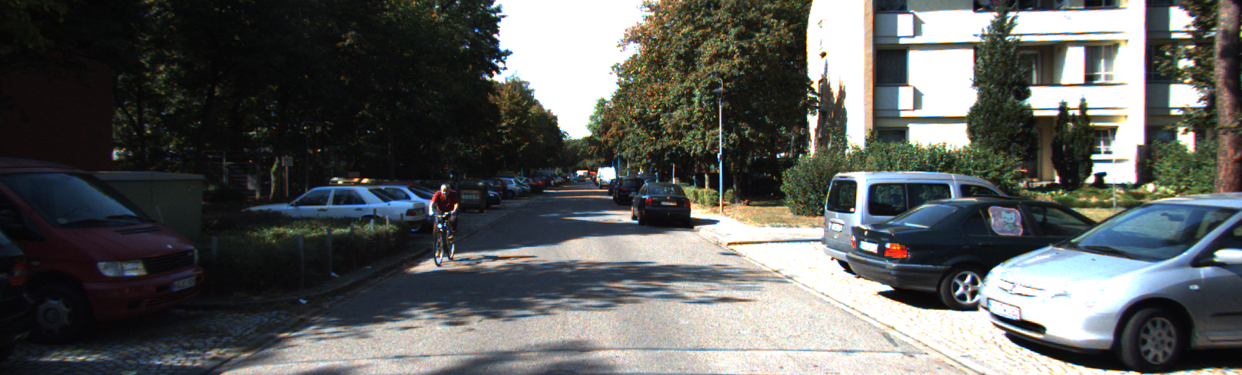

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 1280 --conf 0.25 --source /content/drive/MyDrive/notebooks_python/tfm/datos/data_object_image_2/training/images/005198.png
display.Image(filename='/content/drive/MyDrive/notebooks_python/tfm/datos/data_object_image_2/training/images/005198.png', width=1280)

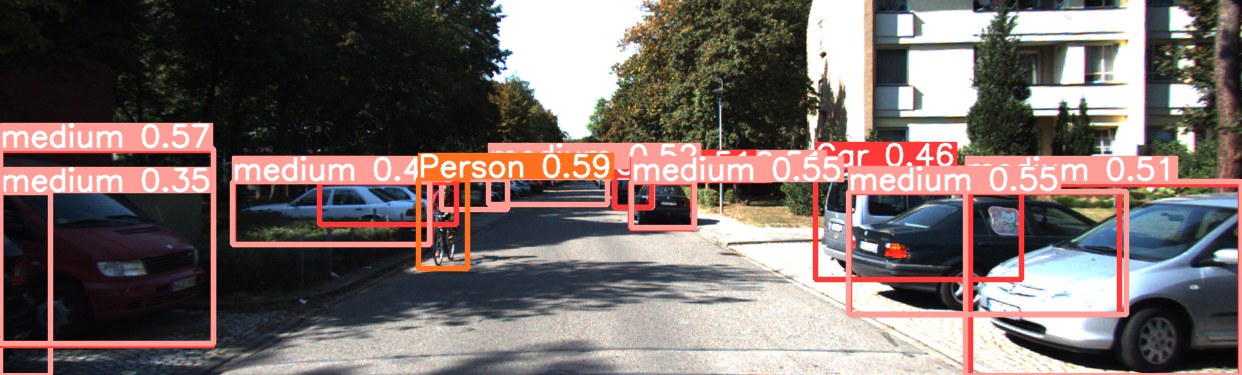

In [ ]:
display.Image(filename='runs/detect/exp/005198.png', width=1280)

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
# import yaml
# from pprint import pprint
# import os
# import shutil


# with open("./data/kitti_dataset_multilabel.yaml", "r") as f:
#     data_file = yaml.safe_load(f.read())

# test_file = os.path.join(data_file["path"], data_file["test"])
# with open(test_file, "r") as f:
#     files = [l for l in f.read().splitlines()]

# for file in files:
#     original = file
#     target = file.replace("images", "test_images")

#     shutil.copyfile(original, target)

In [ ]:
# print(f"Files moved to {os.path.abspath(target)}")

Files moved to /content/drive/MyDrive/notebooks_python/tfm/datos/data_object_image_2/training/test_images/006963.png


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 1280 --imgsz 1280 --conf 0.1 --source /content/drive/MyDrive/notebooks_python/tfm/datos/data_object_image_2/training/test_images/

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/notebooks_python/tfm/datos/data_object_image_2/training/test_images/, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-159-gdb6ec66 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 378 layers, 35283552 parameters, 0 gradients, 49.1 GFLOPs
image 1/225 /content/drive/MyDrive/notebooks_python/tfm/datos/data_object_image_2/training/test_images/000034.png: 448x1280 1 Car, 2 mediums, 3 Otherss, Done. (0.108s)
image 2/225 /content/drive/MyDrive/notebooks_python/tfm/datos/data_object_image_2/training/test_images/000079.png: 448x1280 4 Cars, 5 mediums, 1 low, 2 Oth

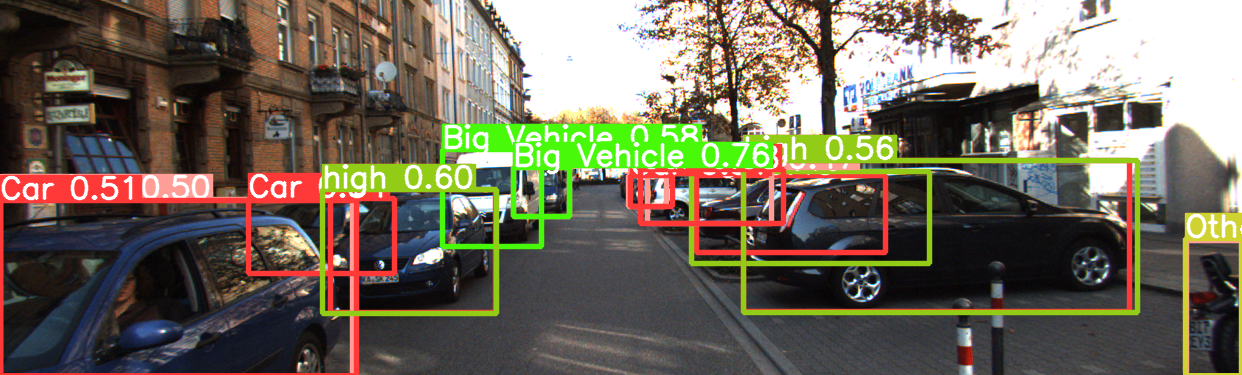

In [ ]:
# we print one image with some high
display.Image(filename='runs/detect/exp2/007156.png', width=1280)

In [ ]:
!python val.py --batch 16 --weight runs/train/exp/weights/best.pt --img 1280 --data kitti_dataset_multilabel.yaml

val: data=/content/yolov5/data/kitti_dataset_multilabel.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=16, imgsz=1280, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-159-gdb6ec66 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 378 layers, 35283552 parameters, 0 gradients, 49.1 GFLOPs
val: Scanning '/content/drive/MyDrive/notebooks_python/tfm/datos/yolo_v5_no_distances_valid.cache' images and labels... 225 found, 0 missing, 0 empty, 0 corrupted: 100% 225/225 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 15/15 [00:22<00:00,  1.47s/it]
                 all        225       2836      0.758      0.645      0.695      0.448
                 Car        225        786      0

In [ ]:
# se guarda un backup (para evitar que se pare google collab)

%ls -al runs/val/exp

!zip  -r 20211230yolo_v5_training_10_freeze_6m_50_testr_results.zip runs/val/exp
%ls -al | grep zip
%mv ./20211230yolo_v5_training_10_freeze_6m_50_testr_results.zip /content/drive/MyDrive/notebooks_python/tfm/yolov5_algorithm/

total 3080
drwxr-xr-x 2 root root   4096 Dec 30 15:17 ./
drwxr-xr-x 3 root root   4096 Dec 30 15:16 ../
-rw-r--r-- 1 root root 192342 Dec 30 15:17 confusion_matrix.png
-rw-r--r-- 1 root root 265648 Dec 30 15:17 F1_curve.png
-rw-r--r-- 1 root root 241320 Dec 30 15:17 P_curve.png
-rw-r--r-- 1 root root 240567 Dec 30 15:17 PR_curve.png
-rw-r--r-- 1 root root 238509 Dec 30 15:17 R_curve.png
-rw-r--r-- 1 root root 307019 Dec 30 15:16 val_batch0_labels.jpg
-rw-r--r-- 1 root root 315499 Dec 30 15:16 val_batch0_pred.jpg
-rw-r--r-- 1 root root 339931 Dec 30 15:16 val_batch1_labels.jpg
-rw-r--r-- 1 root root 347828 Dec 30 15:16 val_batch1_pred.jpg
-rw-r--r-- 1 root root 316264 Dec 30 15:16 val_batch2_labels.jpg
-rw-r--r-- 1 root root 323857 Dec 30 15:16 val_batch2_pred.jpg
  adding: runs/val/exp/ (stored 0%)
  adding: runs/val/exp/val_batch2_labels.jpg (deflated 9%)
  adding: runs/val/exp/F1_curve.png (deflated 6%)
  adding: runs/val/exp/PR_curve.png (deflated 7%)
  adding: runs/val/exp/val_batc

Video

In [ ]:
%cp /content/drive/MyDrive/notebooks_python/tfm/yolov5_algorithm/20220101_resultados_yolo5m6_buenos/20211228_yolo_v5_training_50_6m.zip ./

!unzip 20211228_yolo_v5_training_50_6m.zip

Archive:  20211228_yolo_v5_training_50_6m.zip
   creating: runs/train/exp/
  inflating: runs/train/exp/train_batch1.jpg  
  inflating: runs/train/exp/events.out.tfevents.1640786877.6ae9a751e3e7.361.0  
  inflating: runs/train/exp/labels_correlogram.jpg  
  inflating: runs/train/exp/train_batch2.jpg  
  inflating: runs/train/exp/events.out.tfevents.1640770886.a7c5c3ffa844.370.0  
  inflating: runs/train/exp/labels.jpg  
  inflating: runs/train/exp/results.csv  
  inflating: runs/train/exp/events.out.tfevents.1640796912.7ea2480f5a4b.11458.0  
  inflating: runs/train/exp/hyp.yaml  
   creating: runs/train/exp/weights/
  inflating: runs/train/exp/weights/best.pt  
  inflating: runs/train/exp/weights/epoch30.pt  
  inflating: runs/train/exp/weights/last.pt  
  inflating: runs/train/exp/weights/epoch20.pt  
  inflating: runs/train/exp/weights/epoch10.pt  
  inflating: runs/train/exp/train_batch0.jpg  
  inflating: runs/train/exp/events.out.tfevents.1640694258.e50a1fb94ebd.14835.0  
  inflati

In [ ]:
!python detect.py --weight runs/train/exp/weights/best.pt --source /content/drive/MyDrive/notebooks_python/video_demo_master_v2.mp4

Se han truncado las últimas 5000 líneas del flujo de salida.
video 1/1 (2/31176) /content/drive/MyDrive/notebooks_python/video_demo_master_v2.mp4: 384x640 1 Car, 4 lows, Done. (0.069s)
video 1/1 (3/31176) /content/drive/MyDrive/notebooks_python/video_demo_master_v2.mp4: 384x640 1 Car, 2 lows, 1 Others, Done. (0.070s)
video 1/1 (4/31176) /content/drive/MyDrive/notebooks_python/video_demo_master_v2.mp4: 384x640 1 Car, 1 medium, 2 lows, 1 Others, Done. (0.066s)
video 1/1 (5/31176) /content/drive/MyDrive/notebooks_python/video_demo_master_v2.mp4: 384x640 1 Car, 1 low, 2 Otherss, Done. (0.063s)
video 1/1 (6/31176) /content/drive/MyDrive/notebooks_python/video_demo_master_v2.mp4: 384x640 1 Car, 1 Person, 5 lows, 4 Otherss, Done. (0.059s)
video 1/1 (7/31176) /content/drive/MyDrive/notebooks_python/video_demo_master_v2.mp4: 384x640 1 Car, 4 lows, 3 Otherss, Done. (0.058s)
video 1/1 (8/31176) /content/drive/MyDrive/notebooks_python/video_demo_master_v2.mp4: 384x640 1 Car, 4 lows, 3 Otherss, Don

In [ ]:
%ls runs/detect/exp/
%cp runs/detect/exp/video_demo_master.mp4 /content/drive/MyDrive/notebooks_python/video_demo_master_processed_v2.mp4